# **[Data4Life] - Introduction to Data Science**
Topic ***NBA*** - Group ***16***

## **Our motivation**
The NBA is one of the most popular sports leagues worldwide. It has been captivating millions of fans with its teams, players and storied history. Because of its popularity, it generate vast amount of data from game statistics to player achievements lead to create an excellent opportunity to apply data science techniques to analyze trends, identify patterns and derive meaningful insights.

Our works is designed to serve for **sports enthusiasts** who will gain a richer understanding of individual game performance and season-wide trends, **Team and League Stakeholders** who will use these insights for better decision-making and the last one, **data science community** who can learn about practical applications of data science in sports and inspiring further exploration in this field. (I hope that :>>)

## **Our purpose**
- Provide NBA fans, analysts and stakeholders with deeper insights into team and player performance through data-drive approaches.
- Assist coaches, managers or team owners in optimizing strategies and resources.
- Demonstrate how data science can be applied to a real-world context, showcasing the power of statistical analysis and machine learning in sports analytics.

## **Our key objective**

### **Title 0: Overview of the Current NBA Situation**
- Provide an initial analysis to contextualize the state of the NBA.
- Break down insights into three main categories:
   1. Players
   2. Teams
   3. Data Modelling

### **Title 1: Players**

**Objective 1: Identify high-performing and consistent players (2020-2025)**
- Focus on players with high performance and consistency in the past five years.
- Use Efficiency (EFF) as the primary metric:

$$EFF = \frac{(PTS+REB+AST+STL+BLK)−((FGA−FGM)+(FTA−FTM)+TO)}{GP}$$
​
Where:
- PTS: Points scored
- REB: Total rebounds (offensive + defensive)
- AST: Assists
- STL: Steals
- BLK: Blocks
- FGA, FGM: Field goals attempted and made
- FTA, FTM: Free throws attempted and made
- TO: Turnovers
- GP: Games played

Analyze EFF trends:
- Evaluate EFF variability across seasons
- Analyze EFF changes with age (does performance decline as players get older?)

**Objective 2: Identify Top-performing rookies (2024-2025)**
- Focus only on the current season to identify rookies with standout performances
- Key metrics: EFF, PTS, REB, AST

**Objective 3: Analyze player performance by position**
- Break down player performance based on their roles:
  - Defensive Players: Metric like REB, STL, BLK
  - Attackers (Scores): Metric like PTS, FG%, 3P%
  - Playmakers (Shooting/Passing): Metric like AST, FG%, 3P%, FT%

Approach: 
- Calculate averages and standard deviations for EFF across years for consistency
- Segment players by position (DEF, ATK, Playmaker)
- Compare rookies' performance against established players

### **Title 2: Teams**

**Objective: Analyze Team Weaknesses**
- Identify areas where teams are underperforming:
   - If a team has a low offensive score (ATK), recommend acquiring players strong in scoring metrics (e.g., PTS, FG%, 3P%)
   - If a team has a weak defense, focus on players with high REB, STL, BLK

Approach:
- Aggregate team-level metrics (e.g., average PTS, REB, STL) and compare them across the league
- Identify statistically significant deficiencies (e.g., below the league average)
- Recommend specific player profiles to address these weakness

### **Title 3: Data Modelling**

**Objective: Predict Future Performance**
- Develop a model to predict whether a player's performance will remain high in the next season
- Use player data from past seasons to build predictive models, incorporating:
   - EFF
   - Age
   - Historical trends in metrics like PTS, REB, AST, STL, BLK

Approach:
1. Feature Engineering
   - Create relevant features (e.g., age, position, past EFF trends)

2. Train Predictive Models
   - Models: Linear regression, random forest or Neural Networks
   - Evaluate performance using metrics like RMSE or MAE

3. Test the model
   - Validate predictions against current season data to ensure accuracy



### **IMPORT MODULES**

In [1938]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1939]:
team_mapping = {
    "MIL": "MILWAUKEE BUCKS",
    "DEN": "DENVER NUGGETS",
    "OKC": "OKLAHOMA CITY THUNDER",
    "CHA": "CHARLOTTE HORNETS",
    "DAL": "DALLAS MAVERICKS",
    "BOS": "BOSTON CELTICS",
    "LAL": "LOS ANGELES LAKERS",
    "MIN": "MINNESOTA TIMBERWOLVES",
    "SAC": "SACRAMENTO KINGS",
    "PHX": "PHOENIX SUNS",
    "PHI": "PHILADELPHIA 76ERS",
    "NYK": "NEW YORK KNICKS",
    "ORL": "ORLANDO MAGIC",
    "MIA": "MIAMI HEAT",
    "DET": "DETROIT PISTONS",
    "SAS": "SAN ANTONIO SPURS",
    "TOR": "TORONTO RAPTORS",
    "LAC": "LA CLIPPERS",
    "CLE": "CLEVELAND CAVALIERS",
    "GSW": "GOLDEN STATE WARRIORS",
    "CHI": "CHICAGO BULLS",
    "MEM": "MEMPHIS GRIZZLIES",
    "ATL": "ATLANTA HAWKS",
    "WAS": "WASHINGTON WIZARDS",
    "IND": "INDIANA PACERS",
    "BKN": "BROOKLYN NETS",
    "HOU": "HOUSTON ROCKETS",
    "UTA": "UTAH JAZZ",
    "POR": "PORTLAND TRAIL BLAZERS",
    "NOP": "NEW ORLEANS PELICANS",
}

# Players

### **Title 1: Player Performance and Consistency Analysis (2020-2025)**

**Objective 1: Identify high-performing and consistent players (2020-2025)**
- Focus on players with high performance and consistency in the past five years.
- Use Efficiency (EFF) as the primary metric:

$$EFF = \frac{(PTS+REB+AST+STL+BLK)−((FGA−FGM)+(FTA−FTM)+TO)}{GP}$$

Where:
- PTS: Points scored
- REB: Total rebounds (offensive + defensive)
- AST: Assists
- STL: Steals
- BLK: Blocks
- FGA, FGM: Field goals attempted and made
- FTA, FTM: Free throws attempted and made
- TO: Turnovers
- GP: Games played

**Analysis Focus:**
- Evaluate trends in Efficiency (EFF) over the past five years.
- Analyze how Games Played (GP), Age, Experience (EXP), and Minutes Played (MIN) correlate with EFF.
- Investigate whether performance declines as players get older (age-related performance changes).
- Identify players with high consistency in performance across seasons.


### **LOAD DATASETS**

In [1940]:
nba_roster = pd.read_csv("Data_NBA_1/nba_roster.csv")

nba_stats = pd.read_csv("Data_NBA_1/nba_stats.csv")

### **CLEAN DATA**

In [1941]:
nba_roster.columns = nba_roster.columns.str.lower()

nba_stats.columns = nba_stats.columns.str.lower()

nba_roster = nba_roster.drop(
    columns=["school", "how acquired", "player link", "birthdate", "#"]
).rename(columns={"team name": "team"})

nba_stats = nba_stats.drop(columns="#")

nba_stats["team"] = nba_stats["team"].map(arg=team_mapping)

In [1942]:
nba_roster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   player  2577 non-null   object
 1   pos     2576 non-null   object
 2   height  2577 non-null   object
 3   weight  2577 non-null   object
 4   age     2577 non-null   int64 
 5   exp     2577 non-null   object
 6   team    2577 non-null   object
 7   season  2577 non-null   object
dtypes: int64(1), object(7)
memory usage: 161.2+ KB


The exp (experience) column is expected to be numerical because it represents the number of years a player has played in the NBA. However, based on the information above, it appears to be a categorical value so we need to investigate what caused this problem.

In [1943]:
nba_roster["exp"].unique()

array(['7', '15', '8', '4', '1', '2', 'R', '3', '17', '6', '14', '16',
       '5', '13', '9', '12', '10', '11', '18', '19', '21', '20'],
      dtype=object)

We need to identify all records that contain the **R** value in the **exp** column.

In [1944]:
nba_roster[nba_roster["exp"] == "R"]

,player,pos,height,weight,age,exp,team,season
10,Anton Watson,F,6-8,225 lbs,24,R,BOSTON CELTICS,2024-25
15,Baylor Scheierman,G,6-6,205 lbs,24,R,BOSTON CELTICS,2024-25
24,Drew Peterson,F,6-9,205 lbs,24,R,BOSTON CELTICS,2023-24
27,Jordan Walsh,G,6-6,205 lbs,20,R,BOSTON CELTICS,2023-24
41,JD Davison,G,6-1,195 lbs,20,R,BOSTON CELTICS,2022-23
...,...,...,...,...,...,...,...,...
2548,Joe Wieskamp,G-F,6-6,205 lbs,22,R,SAN ANTONIO SPURS,2021-22
2550,DJ Stewart,G,6-5,205 lbs,22,R,SAN ANTONIO SPURS,2021-22
2558,Jock Landale,C,6-11,255 lbs,26,R,SAN ANTONIO SPURS,2021-22
2571,Devin Vassell,G-F,6-5,200 lbs,20,R,SAN ANTONIO SPURS,2020-21


Now, we pick a random player from the list (for example, **JD Davison**) to view all of his records.

In [1945]:
nba_roster[nba_roster["player"] == "JD Davison"]

,player,pos,height,weight,age,exp,team,season
7,JD Davison,G,6-1,195 lbs,22,2,BOSTON CELTICS,2024-25
25,JD Davison,G,6-1,195 lbs,21,1,BOSTON CELTICS,2023-24
41,JD Davison,G,6-1,195 lbs,20,R,BOSTON CELTICS,2022-23


We can observe that **JD Davison**'s experience (**exp**) increases with each season from 2022 to 2025. In the 2024-2025 season, he has 2 years of experience, and in the 2023-2024 season, he has 1 year of experience.

From this, we can conclude that the R value in the exp column indicates that the player has no experience (or is a Rookie).

In [1946]:
# Replace 'R' with 0
nba_roster["exp"] = nba_roster["exp"].replace("R", 0)

# Convert the 'exp' column to numeric
nba_roster["exp"] = pd.to_numeric(nba_roster["exp"])

In [1947]:
nba_roster.describe()

,age,exp
count,2577.000000,2577.000000
mean,26.048118,4.309662
std,4.310360,4.088733
min,18.000000,0.000000
25%,23.000000,1.000000
50%,25.000000,3.000000
75%,29.000000,7.000000
max,43.000000,21.000000


In [1948]:
nba_roster.duplicated().sum()

0

---------------

In [1949]:
nba_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   player  1215 non-null   object 
 1   team    1215 non-null   object 
 2   gp      1215 non-null   int64  
 3   min     1215 non-null   float64
 4   pts     1215 non-null   float64
 5   fgm     1215 non-null   float64
 6   fga     1215 non-null   float64
 7   fg%     1215 non-null   float64
 8   3pm     1215 non-null   float64
 9   3pa     1215 non-null   float64
 10  3p%     1215 non-null   float64
 11  ftm     1215 non-null   float64
 12  fta     1215 non-null   float64
 13  ft%     1215 non-null   float64
 14  oreb    1215 non-null   float64
 15  dreb    1215 non-null   float64
 16  reb     1215 non-null   float64
 17  ast     1215 non-null   float64
 18  stl     1215 non-null   float64
 19  blk     1215 non-null   float64
 20  tov     1215 non-null   float64
 21  eff     1215 non-null   float64
 22  

In [1950]:
nba_stats.describe()

,gp,min,pts,fgm,fga,fg%,3pm,3pa,3p%,ftm,fta,ft%,oreb,dreb,reb,ast,stl,blk,tov,eff
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.00000,1215.000000,1215.000000,1215.000000,1215.00000,1215.000000,1215.000000,1215.000000
mean,58.381893,25.488807,12.220658,4.477449,9.486502,47.537284,1.387243,3.791276,33.477202,1.880247,2.397449,77.105103,1.07284,3.540658,4.611029,2.770700,0.81251,0.514897,1.410123,13.987407
std,19.516453,7.041780,6.425344,2.278638,4.723507,7.291400,0.941341,2.410177,11.104579,1.552589,1.894943,10.057341,0.81754,1.839349,2.456936,2.024198,0.35972,0.445535,0.831200,6.552675
min,17.000000,6.900000,1.200000,0.400000,0.500000,29.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.10000,0.600000,0.800000,0.200000,0.10000,0.000000,0.100000,1.700000
25%,54.000000,19.950000,7.400000,2.700000,5.900000,42.900000,0.700000,2.100000,31.500000,0.800000,1.100000,71.400000,0.50000,2.300000,2.900000,1.300000,0.60000,0.200000,0.800000,9.200000
50%,65.000000,26.100000,10.600000,3.900000,8.300000,46.000000,1.300000,3.600000,35.600000,1.400000,1.900000,78.600000,0.80000,3.200000,4.100000,2.100000,0.80000,0.400000,1.200000,12.700000
75%,72.000000,31.500000,16.000000,5.800000,12.500000,50.250000,2.000000,5.300000,38.900000,2.400000,3.100000,84.400000,1.40000,4.300000,5.600000,3.700000,1.00000,0.700000,1.800000,17.500000
max,84.000000,38.400000,33.900000,12.800000,24.800000,80.000000,5.300000,13.100000,100.000000,10.000000,12.300000,100.000000,4.70000,11.000000,14.700000,12.100000,3.00000,3.600000,4.800000,42.100000


In [1951]:
nba_stats.duplicated().sum()

0

In [1952]:
merged_data = pd.merge(
    nba_stats,
    nba_roster,
    how="left",
    left_on=["player", "team", "season"],
    right_on=["player", "team", "season"],
)

merged_data.isnull().sum()

player    0
team      0
gp        0
min       0
pts       0
fgm       0
fga       0
fg%       0
3pm       0
3pa       0
3p%       0
ftm       0
fta       0
ft%       0
oreb      0
dreb      0
reb       0
ast       0
stl       0
blk       0
tov       0
eff       0
season    0
pos       0
height    0
weight    0
age       0
exp       0
dtype: int64

In [1953]:
merged_data.head(10)

,player,team,gp,min,pts,fgm,fga,fg%,3pm,3pa,...,stl,blk,tov,eff,season,pos,height,weight,age,exp
0,Giannis Antetokounmpo,MILWAUKEE BUCKS,23,35.2,32.7,12.8,20.8,61.4,0.1,0.7,...,0.6,1.6,3.3,36.7,2024-25,F,6-11,243 lbs,30,11
1,Nikola Jokić,DENVER NUGGETS,21,37.3,30.9,11.8,21.1,55.8,2.1,4.4,...,1.8,0.7,3.9,42.1,2024-25,C,6-11,284 lbs,29,9
2,Shai Gilgeous-Alexander,OKLAHOMA CITY THUNDER,26,34.5,30.5,10.7,20.8,51.3,2.1,6.2,...,2.0,1.0,2.7,31.3,2024-25,G,6-6,195 lbs,26,6
3,LaMelo Ball,CHARLOTTE HORNETS,20,33.7,30.4,10.5,24.8,42.1,4.5,13.1,...,1.4,0.2,4.3,25.2,2024-25,G,6-7,180 lbs,23,4
4,Luka Dončić,DALLAS MAVERICKS,20,37.0,28.9,10.1,21.9,45.9,3.6,10.0,...,2.1,0.5,3.5,31.3,2024-25,F-G,6-6,230 lbs,25,6
5,Jayson Tatum,BOSTON CELTICS,25,36.4,28.3,9.3,20.5,45.3,3.8,10.5,...,1.2,0.5,2.8,29.1,2024-25,F-G,6-8,210 lbs,26,7
6,Anthony Davis,LOS ANGELES LAKERS,25,35.3,27.8,10.1,18.9,53.4,0.7,2.4,...,1.2,2.0,2.2,32.9,2024-25,F-C,6-10,253 lbs,31,12
7,Anthony Edwards,MINNESOTA TIMBERWOLVES,25,35.9,26.2,9.2,20.3,45.4,4.3,10.2,...,1.3,0.6,3.1,22.4,2024-25,G,6-4,225 lbs,23,4
8,De'Aaron Fox,SACRAMENTO KINGS,27,37.3,26.2,9.7,20.2,48.3,2.0,6.3,...,1.6,0.3,3.5,24.2,2024-25,G,6-3,185 lbs,27,7
9,Damian Lillard,MILWAUKEE BUCKS,22,36.4,25.7,7.9,17.6,45.0,3.5,9.3,...,1.0,0.2,3.0,25.7,2024-25,G,6-2,195 lbs,34,12


### **GENERAL**

## **Evaluate trends in Efficiency (EFF) over the past five years**

**Objective 1 - Question 1: What is the information of eff of the NBA players though each season?**

In [1954]:
season_group = merged_data.groupby(by='season')

for year, group in season_group:
    desc = group['eff'].describe()
    print(f"{year:<10} Count: {desc['count']:<6.0f} 25%: {desc['25%']:<8.2f} Mean: {desc['mean']:<8.2f} 75%: {desc['75%']:<8.2f} Std: {desc['std']:<8.2f} Min: {desc['min']:<8.2f} Max: {desc['max']:<8.2f}")

2020-21    Count: 237    25%: 9.00     Mean: 13.73    75%: 16.70    Std: 6.47     Min: 2.90     Max: 35.90   
2021-22    Count: 228    25%: 9.70     Mean: 13.92    75%: 17.00    Std: 5.99     Min: 4.30     Max: 38.70   
2022-23    Count: 245    25%: 9.20     Mean: 14.29    75%: 18.10    Std: 6.46     Min: 3.30     Max: 38.00   
2023-24    Count: 240    25%: 9.40     Mean: 14.47    75%: 18.60    Std: 6.76     Min: 4.00     Max: 38.50   
2024-25    Count: 265    25%: 8.70     Mean: 13.57    75%: 17.30    Std: 6.98     Min: 1.70     Max: 42.10   


**Objective 1 - Question 2: What is the distribution of efficiency of the NBA players though each season?**

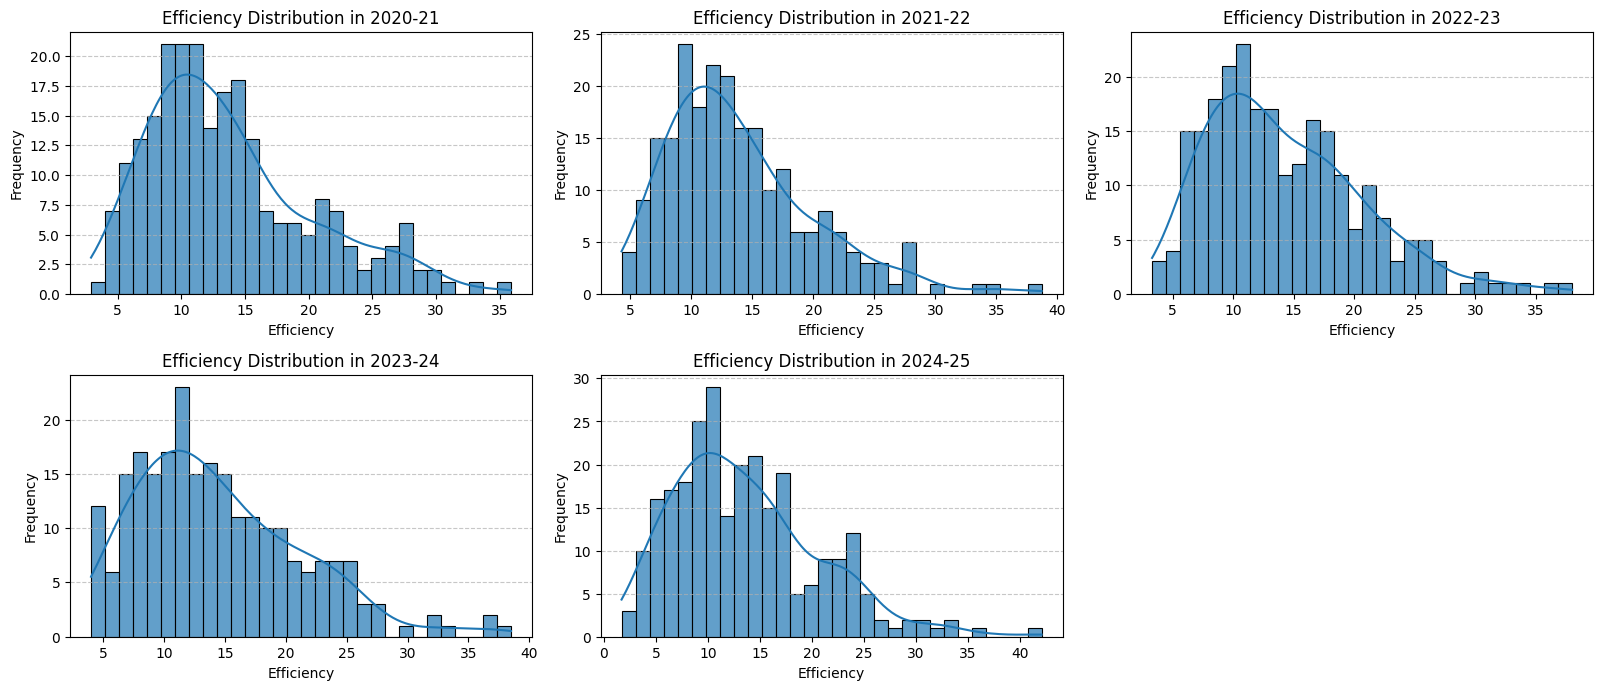

In [1955]:
seasons = sorted(merged_data["season"].unique())  
num_seasons = len(seasons)

plt.figure(figsize=(16, num_seasons * 2))

for i, season in enumerate(seasons):
    plt.subplot((num_seasons + 1) // 2, 3, i + 1)  
    season_data = merged_data[merged_data["season"] == season]
    sns.histplot(season_data["eff"], bins=30, edgecolor="black", alpha=0.7, kde=True)
    plt.title(f"Efficiency Distribution in {season}")
    plt.xlabel("Efficiency")
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

### **INSIGHTS**

- Across the seasons, the average efficiency scores (mean) remain relatively stable, ranging from 13.57 to 14.47, indicating consistent overall performance levels in the league.
- The maximum efficiency score varies significantly, reaching as high as 42.10 in 2024-25, showing that elite players continue to push the boundaries of individual performance.
- The standard deviation of efficiency (ranging from 5.99 to 6.98) suggests moderate variability in player performance, with the league featuring both high-performing players and those with lower efficiency.
- The 25th and 75th percentiles remain close across seasons (e.g., 9.00 to 9.70 for the 25th percentile and 16.70 to 18.60 for the 75th percentile), showing stability in the performance range of the middle group of players.
- The number of players analyzed grows over the seasons, from 237 in 2020-21 to 265 in 2024-25, reflecting either league expansion, changes in data collection, or increasing participation.

## **Analyze how Games Played (GP), Age, Experience (EXP), and Minutes Played (MIN) correlate with EFF.**


**Objective 1 - Question 3: What is the information of age of the NBA players though each season?**

In [1956]:
for year, group in season_group:
    desc = group['age'].describe()
    print(f"{year:<10} Count: {desc['count']:<6.0f} 25%: {desc['25%']:<8.2f} Mean: {desc['mean']:<8.2f} 75%: {desc['75%']:<8.2f} Std: {desc['std']:<8.2f} Min: {desc['min']:<8.2f} Max: {desc['max']:<8.2f}")

2020-21    Count: 237    25%: 23.00    Mean: 26.52    75%: 29.00    Std: 4.18     Min: 19.00    Max: 37.00   
2021-22    Count: 228    25%: 23.00    Mean: 26.40    75%: 29.00    Std: 4.23     Min: 19.00    Max: 38.00   
2022-23    Count: 245    25%: 23.00    Mean: 26.27    75%: 29.00    Std: 4.00     Min: 19.00    Max: 38.00   
2023-24    Count: 240    25%: 23.00    Mean: 26.73    75%: 30.00    Std: 4.39     Min: 19.00    Max: 39.00   
2024-25    Count: 265    25%: 23.00    Mean: 26.26    75%: 29.00    Std: 4.38     Min: 19.00    Max: 39.00   


**Objective 1 - Question 4: What is the information of exp of the NBA players though each season?**

In [1957]:
for year, group in season_group:
    desc = group['exp'].describe()
    print(f"{year:<10} Count: {desc['count']:<6.0f} 25%: {desc['25%']:<8.2f} Mean: {desc['mean']:<8.2f} 75%: {desc['75%']:<8.2f} Std: {desc['std']:<8.2f} Min: {desc['min']:<8.2f} Max: {desc['max']:<8.2f}")

2020-21    Count: 237    25%: 2.00     Mean: 4.77     75%: 7.00     Std: 3.89     Min: 0.00     Max: 17.00   
2021-22    Count: 228    25%: 2.00     Mean: 4.77     75%: 7.00     Std: 3.85     Min: 0.00     Max: 18.00   
2022-23    Count: 245    25%: 2.00     Mean: 4.76     75%: 7.00     Std: 3.63     Min: 0.00     Max: 17.00   
2023-24    Count: 240    25%: 2.00     Mean: 5.29     75%: 8.00     Std: 4.17     Min: 0.00     Max: 20.00   
2024-25    Count: 265    25%: 2.00     Mean: 5.41     75%: 8.00     Std: 4.20     Min: 0.00     Max: 21.00   


**Objective 1 - Question 5: What is the information of minutes played of the NBA players though each season?**

In [1958]:
for year, group in season_group:
    desc = group['min'].describe()
    print(f"{year:<10} Count: {desc['count']:<6.0f} 25%: {desc['25%']:<8.2f} Mean: {desc['mean']:<8.2f} 75%: {desc['75%']:<8.2f} Std: {desc['std']:<8.2f} Min: {desc['min']:<8.2f} Max: {desc['max']:<8.2f}")

2020-21    Count: 237    25%: 19.40    Mean: 25.31    75%: 31.10    Std: 6.60     Min: 9.60     Max: 37.60   
2021-22    Count: 228    25%: 21.10    Mean: 25.92    75%: 31.40    Std: 6.41     Min: 10.90    Max: 37.90   
2022-23    Count: 245    25%: 20.20    Mean: 25.91    75%: 31.70    Std: 7.03     Min: 10.40    Max: 37.40   
2023-24    Count: 240    25%: 19.58    Mean: 25.59    75%: 31.70    Std: 7.07     Min: 9.90     Max: 37.80   
2024-25    Count: 265    25%: 18.70    Mean: 24.79    75%: 31.80    Std: 7.87     Min: 6.90     Max: 38.40   


**Objective 1 - Question 6: What is the information of games played of the NBA players though each season?**

In [1959]:
for year, group in season_group:
    desc = group['gp'].describe()
    print(f"{year:<10} Count: {desc['count']:<6.0f} 25%: {desc['25%']:<8.2f} Mean: {desc['mean']:<8.2f} 75%: {desc['75%']:<8.2f} Std: {desc['std']:<8.2f} Min: {desc['min']:<8.2f} Max: {desc['max']:<8.2f}")

2020-21    Count: 237    25%: 57.00    Mean: 61.81    75%: 67.00    Std: 6.30     Min: 51.00    Max: 72.00   
2021-22    Count: 228    25%: 65.00    Mean: 69.39    75%: 74.00    Std: 6.27     Min: 58.00    Max: 82.00   
2022-23    Count: 245    25%: 64.00    Mean: 70.04    75%: 76.00    Std: 6.98     Min: 58.00    Max: 83.00   
2023-24    Count: 240    25%: 65.75    Mean: 70.83    75%: 76.25    Std: 7.14     Min: 58.00    Max: 84.00   
2024-25    Count: 265    25%: 21.00    Mean: 23.78    75%: 26.00    Std: 2.68     Min: 17.00    Max: 29.00   


**Objective 1 - Question 3: What is the correlation between eff, age and exp in all dataset?**

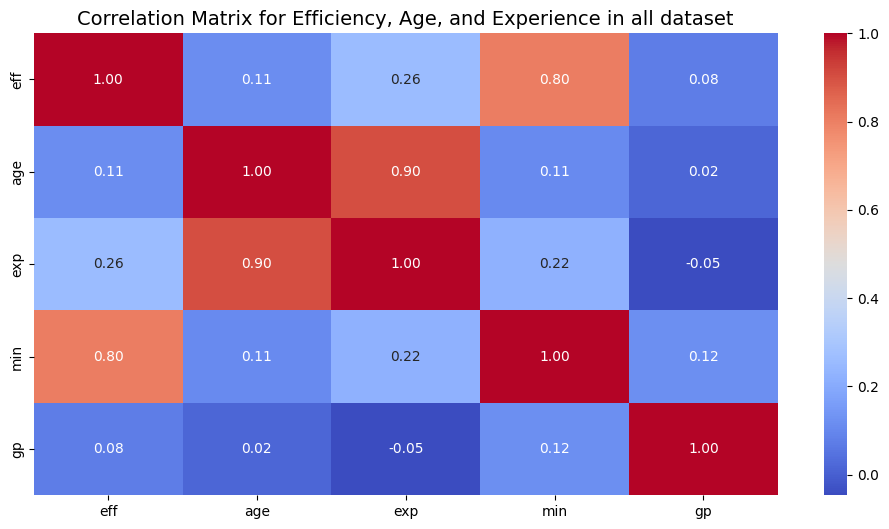

In [1960]:
correlation_data = merged_data[["eff", "age", "exp", "min", "gp"]].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

plt.title("Correlation Matrix for Efficiency, Age, and Experience in all dataset", fontsize=14)
plt.show()

### **INSIGHTS**

- The correlation between **efficiency (eff)** and **age** is **0.11**, which is a weak positive correlation. This indicates that age has very little impact on player efficiency, showing that players of any age can achieve high levels of efficiency.
- Comparing **efficiency (eff)** and **experience (exp)** reveals a correlation of **0.26**, which is a moderate positive relationship. This suggests that experience has a stronger influence on efficiency than age, implying that veteran players are generally more efficient than less experienced ones.
- The correlation between **efficiency (eff)** and **minutes played (min)** is **0.80**, which is a very strong positive correlation. This shows that players who spend more time on the court tend to achieve much higher efficiency, emphasizing the critical role of playing time in determining performance.
- Lastly, the correlation between **efficiency (eff)** and **games played (gp)** is **0.08**, a very weak positive correlation. This indicates that the number of games a player participates in has almost no effect on their efficiency, suggesting that consistent performance is not dependent on how many games are played.

## **Investigate whether efficiency declines as players get older (age-related and exp-related performance changes).**


**Objective 1 - Question 4: What is the trend of age and eff in all dataset?**

In [1961]:
# Create age bins
bins_age = [20, 25, 30, 35, 40]  # Adjust bins if needed
labels_age = ['20-25', '26-30', '31-35', '36+']
merged_data['age_group'] = pd.cut(merged_data['age'], bins=bins_age, labels=labels_age, right=False)

# Group by age group and calculate mean of metrics
age_group_stats = merged_data.groupby('age_group', observed=True).agg({
    'eff': 'mean'
}).reset_index()

age_group_stats

,age_group,eff
0,20-25,12.958482
1,26-30,14.767527
2,31-35,14.519748
3,36+,14.094118


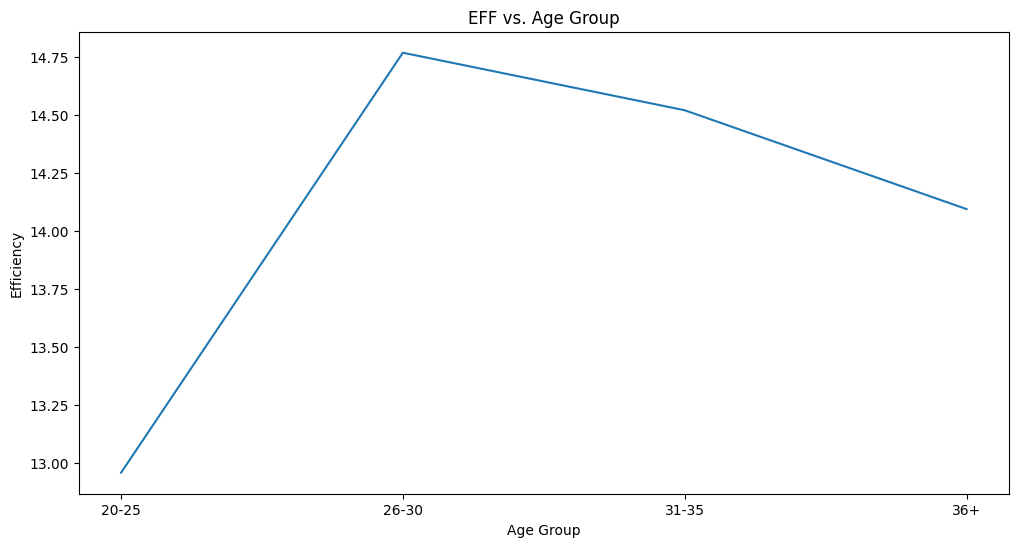

In [1962]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

sns.lineplot(data=age_group_stats, x='age_group', y='eff')
plt.title("EFF vs. Age Group")  # Add subplot titles
plt.xlabel('Age Group')
plt.ylabel('Efficiency')
plt.show()

## **INSIGHTS INTO AGE-RELATED PERFORMANCE CHANGES**
### **AGE GROUP EFFICIENCY TRENDS**
- Players aged 20–25 have the lowest average efficiency (12.96). This may indicate that younger players are still developing their skills and adapting to high-level competition.
- Efficiency peaks in the 26–30 age group (14.77), suggesting this age bracket is the optimal performance period, likely due to a combination of physical prime and accumulated experience.
- Players aged 36+ show a more noticeable decline (14.09). This is likely due to physical aging, even though experience might still contribute positively.
### **CONCLUSION**
- There is a clear progression where efficiency increases from the youngest group to the 26–30 group, emphasizing the benefit of skill refinement and shaper.
- The gradual decline in efficiency after age 30 highlights the balance between retaining skill and managing physical aging.
- The efficiency of older players (36+) still remains relatively competitive, potentially due to their ability to compensate for physical decline with tactical awareness and experience.

**Objective 1 - Question 5: What is the trend of eff and exp in all dataset?**

In [1963]:
# Create exp bins
bins_exp = [0, 5, 10, 15, 20, 25]  # Adjust bins if needed
labels_exp = ['0-5', '6-10', '11-15', '16-20', '21+']
merged_data['exp_group'] = pd.cut(merged_data['exp'], bins=bins_exp, labels=labels_exp, right=False)

# Group by age group and calculate mean of metrics
exp_group_stats = merged_data.groupby('exp_group', observed=True).agg({
    'eff': 'mean'
}).reset_index()

exp_group_stats

,exp_group,eff
0,0-5,12.357496
1,6-10,15.848010
2,11-15,15.973077
3,16-20,14.561765
4,21+,28.450000


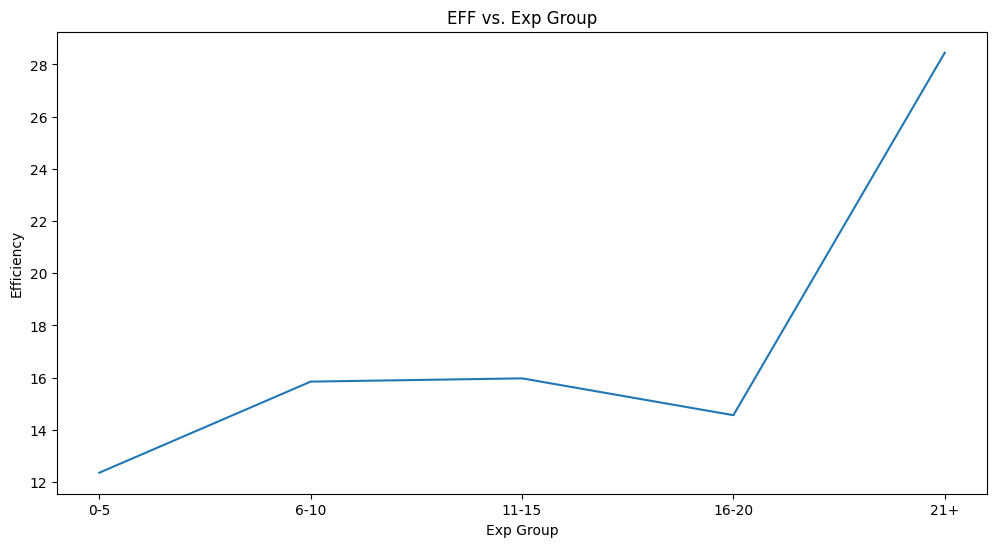

In [1964]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

sns.lineplot(data=exp_group_stats, x='exp_group', y='eff')
plt.title("EFF vs. Exp Group")  # Add subplot titles
plt.xlabel('Exp Group')
plt.ylabel('Efficiency')
plt.show()

## **INSIGHTS INTO EXPERIENCE-RELATED PERFORMANCE CHANGES**
### **EXPERIENCE GROUP EFFICIENCY TRENDS**
- Players with 0–5 years of experience have the lowest average efficiency (12.36). This is likely because newer players are still developing their skills, understanding game dynamics, and adapting to professional levels of competition.
- Efficiency significantly improves in the 6–10 years group (15.85), indicating that players start to reach a mature understanding of the game and have developed their technical skills.
- Players with 21+ years of experience exhibit an extraordinary efficiency score (28.45), which is significantly higher than all other groups. This could be due to their expertise, leadership roles, or specialization in key tasks that maximize their contributions.
### **CONCLUSION**
- Efficiency steadily increases from the least experienced group (0–5 years) to the 11–15 years group, reflecting the critical role of experience in developing performance.
- The sharp rise in efficiency for players with 21+ years of experience suggests that this group is either an outlier or contains a select group of players whose roles or contributions are highly specialized.

## **Identify players with high consistency in performance across seasons.**

**Objective 1 - Question 6: What is the change in efficiency of each player though each season?**

In [1965]:
player_season_data = merged_data.groupby(['player', 'season']).agg({'eff': 'mean'}).reset_index()

player_season_data['eff_change'] = player_season_data.groupby('player')['eff'].diff()

player_season_data

,player,season,eff,eff_change
0,AJ Green,2024-25,8.0,NaN
1,AJ Griffin,2022-23,8.2,NaN
2,Aaron Gordon,2021-22,16.7,NaN
3,Aaron Gordon,2022-23,19.3,2.6
4,Aaron Gordon,2023-24,18.2,-1.1
...,...,...,...,...
1210,Zeke Nnaji,2023-24,4.7,NaN
1211,Ziaire Williams,2021-22,7.4,NaN
1212,Ziaire Williams,2024-25,9.6,2.2
1213,Zion Williamson,2020-21,27.5,NaN


The players have an **eff_change value** of **NaN** because they have only played one season, so there is no previous data for comparison. We will remove them from the dataset.

In [1966]:
# Group by player
player_season_data_grouped = player_season_data.groupby(by='player')

# Filter out players with only 1 season
filtered_data = player_season_data_grouped.filter(lambda x: len(x) > 1)

filtered_data = filtered_data.reset_index().drop(columns='index')

filtered_data.head()

,player,season,eff,eff_change
0,Aaron Gordon,2021-22,16.7,NaN
1,Aaron Gordon,2022-23,19.3,2.6
2,Aaron Gordon,2023-24,18.2,-1.1
3,Aaron Holiday,2020-21,6.0,NaN
4,Aaron Holiday,2021-22,7.3,1.3


After removing players who have only played one season, the dataset still contains **eff_change** values of **NaN** because it is their first season in the NBA, and there is no previous data for comparison. We will replace these NaN values with **0**.

In [1967]:
filtered_data['eff_change'] = filtered_data['eff_change'].replace(np.nan, 0)

filtered_data.head()

,player,season,eff,eff_change
0,Aaron Gordon,2021-22,16.7,0.0
1,Aaron Gordon,2022-23,19.3,2.6
2,Aaron Gordon,2023-24,18.2,-1.1
3,Aaron Holiday,2020-21,6.0,0.0
4,Aaron Holiday,2021-22,7.3,1.3


**Objective 1 - Question 7: Calculate the standard deviation of the efficiency change for each player**


In [1968]:
player_std_data = (filtered_data.groupby('player')['eff_change']
                   .std()
                   .reset_index()
                   .replace(np.nan, 0))

player_std_data.rename(columns={'eff_change': 'eff_std'}, inplace=True)

player_std_data

,player,eff_std
0,Aaron Gordon,1.900000
1,Aaron Holiday,2.165448
2,Aaron Nesmith,1.979899
3,Aaron Wiggins,0.781025
4,Al Horford,0.977667
...,...,...
324,Xavier Tillman,1.131371
325,Zach Collins,2.586503
326,Zach LaVine,1.467424
327,Ziaire Williams,1.555635


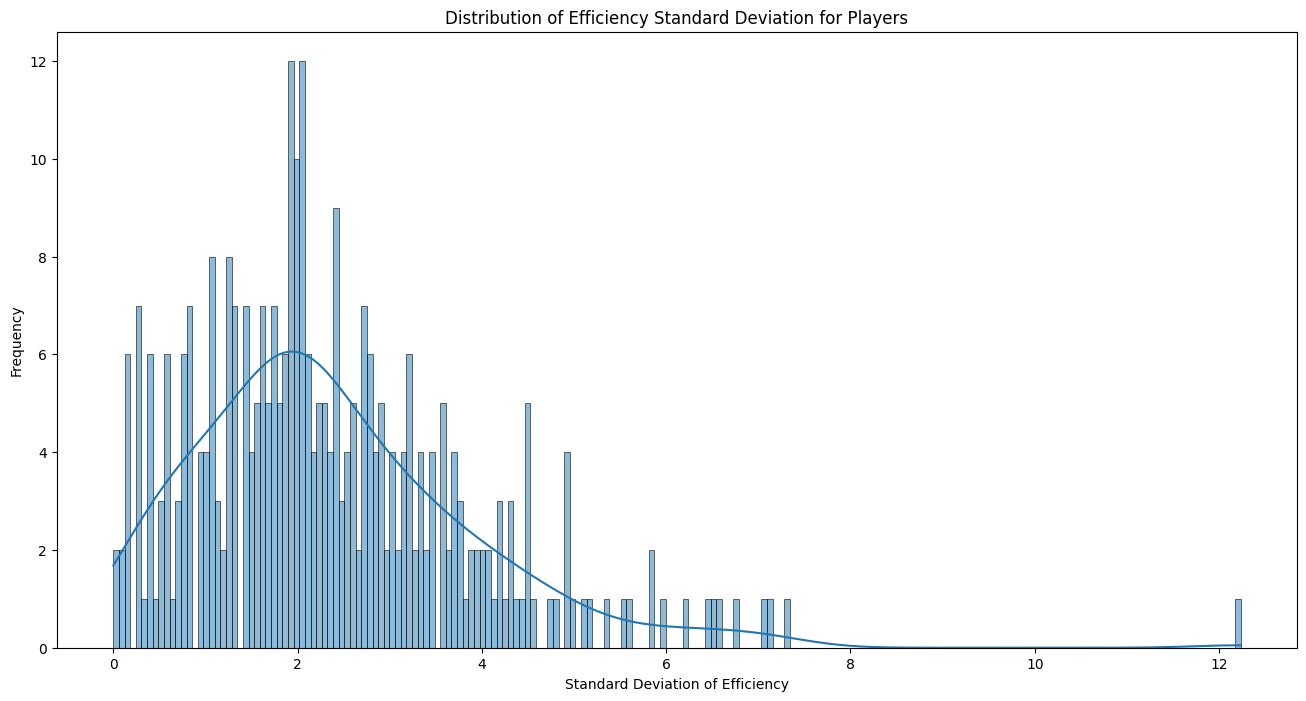

In [1969]:
# Plot the histogram
plt.figure(figsize=(16, 8))

sns.histplot(data=player_std_data, x='eff_std', bins=200, kde=True)
plt.title('Distribution of Efficiency Standard Deviation for Players')
plt.xlabel('Standard Deviation of Efficiency')
plt.ylabel('Frequency')

plt.show()

**Objective 1 - Question 8: Identify players with high consistency (low standard deviation) in performance across seasons**


In [1970]:
# Filter for players with low standard deviation (high consistency)
mean = player_std_data['eff_std'].mean()
std_dev = player_std_data['eff_std'].std()
threshold = mean - std_dev

high_consistency_players = player_std_data[player_std_data['eff_std'] < threshold]

high_consistency_players = high_consistency_players.reset_index().drop(columns='index')

high_consistency_players

,player,eff_std
0,Aaron Wiggins,0.781025
1,Andrew Nembhard,0.141421
2,Anthony Davis,0.424264
3,Bogdan Bogdanović,0.353553
4,Brandon Ingram,0.424264
5,Bruce Brown,0.816497
6,CJ McCollum,0.750555
7,Cedi Osman,0.469042
8,Dalen Terry,0.070711
9,Damion Lee,0.305505
